# Exercise 06
# TensorFlow and Keras


---

###### Sandra Marcela Meneses - Diego Fernando López Castillo 

In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

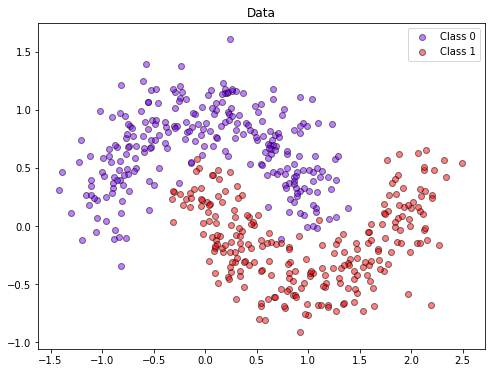

In [2]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

### Construcción del modelo

In [3]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
# Helper functions to inline visualization of computing graphs
# Extracted from: 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
# Functions for plotting 2D data and decision regions
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

C:\Users\diego\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    #DATOS ENTRADA:
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid')
    #MODELO INFERENCIA 
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )
    #FUNCION DE PERDIDA (SIGMOIDE)
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
    #FUNCION ENTRENAMIENTO
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()    
show_graph(graph.as_graph_def())

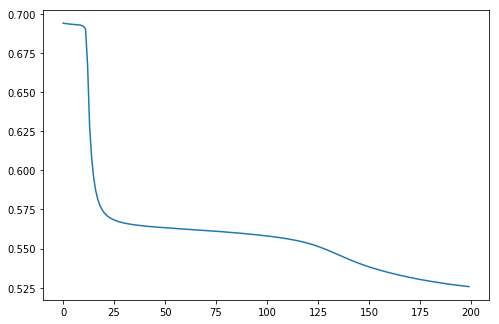

In [6]:
num_epochs = 10000
losses = []
with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train}))                    
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

[[-1.0065718   1.9198568 ]
 [ 7.4264507   4.237926  ]
 [-0.93865496  1.5882891 ]
 [-1.5657984  -1.404393  ]
 [ 5.235078   -0.9764026 ]
 [-2.5380023   2.8699808 ]
 [-2.8385801   2.746244  ]
 [ 0.79598725 -0.37169698]
 [ 1.8388524  -3.3996685 ]
 [-1.0743558   1.3173611 ]]
[[1.0853041e-06]]


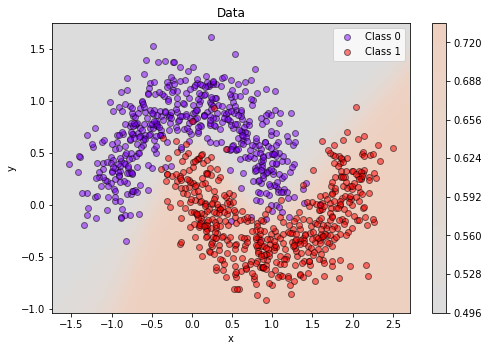

In [7]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


###  *2. Training a text classifier*

In [23]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


Loading data...
8982 train sequences
2246 test sequences
46 classes


Is instance is represented by a sequence of numbers which correspond to indices of the corresponding words.

In [24]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


The map for word to index is also provided, so it is possible to decode the instance back to text:

In [25]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


Data is encoded using a bag of words representation, i.e. a matrix of size num of instances by vocabulary size

In [26]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


Labels are converted to one-hot representation:

In [27]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import SGD,RMSprop,Adagrad,Adam
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

Now we build a dense neural network with one hidden layer:

In [29]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_7 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_7 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_8 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_8 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


We configure the learning task to use SGD as optimization:

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


Now we can train the model using a 0.1 training validation split:

In [31]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 142us/step - loss: 2.4542 - acc: 0.3630 - val_loss: 2.3069 - val_acc: 0.4260
Epoch 2/5
8083/8083 [==============================] - 1s 118us/step - loss: 2.1809 - acc: 0.4397 - val_loss: 2.1788 - val_acc: 0.4750
Epoch 3/5
8083/8083 [==============================] - 1s 119us/step - loss: 2.0693 - acc: 0.4876 - val_loss: 2.0863 - val_acc: 0.4905
Epoch 4/5
8083/8083 [==============================] - 1s 118us/step - loss: 1.9903 - acc: 0.5032 - val_loss: 2.0180 - val_acc: 0.5061
Epoch 5/5
8083/8083 [==============================] - 1s 135us/step - loss: 1.9276 - acc: 0.5163 - val_loss: 1.9608 - val_acc: 0.5150


Finally, we test the performance over the test set:

In [32]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 59us/step
Test score: 1.9264669369504799
Test accuracy: 0.5258236865804117


### Now we will improve the text classifier model:

#### 2.1 Different activation functions for the hidden layer

##### Activation Function = Softplus

In [38]:
model1 = Sequential()
model1.add(Dense(256, input_shape=(max_words,)))
model1.add(Activation('sigmoid'))
model1.add(Dense(num_classes))
model1.add(Activation('softplus'))
model1.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_11 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_11 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_12 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_12 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [39]:
model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [40]:
batch_size = 32
epochs = 5
history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 159us/step - loss: 2.7742 - acc: 0.3434 - val_loss: 2.5425 - val_acc: 0.3315
Epoch 2/5
8083/8083 [==============================] - 1s 117us/step - loss: 2.4462 - acc: 0.3540 - val_loss: 2.4644 - val_acc: 0.3315
Epoch 3/5
8083/8083 [==============================] - 1s 115us/step - loss: 2.3971 - acc: 0.3540 - val_loss: 2.4461 - val_acc: 0.3315
Epoch 4/5
8083/8083 [==============================] - 1s 118us/step - loss: 2.3783 - acc: 0.3540 - val_loss: 2.4369 - val_acc: 0.3315
Epoch 5/5
8083/8083 [==============================] - 1s 118us/step - loss: 2.3661 - acc: 0.3540 - val_loss: 2.4292 - val_acc: 0.3315


In [41]:
score = model1.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 55us/step
Test score: 2.380280042692475
Test accuracy: 0.36197684778237277


##### Activation Function = relu

In [48]:
model2 = Sequential()
model2.add(Dense(256, input_shape=(max_words,)))
model2.add(Activation('sigmoid'))
model2.add(Dense(num_classes))
model2.add(Activation('relu'))
model2.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_17 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_17 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_18 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_18 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [44]:
model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [45]:
batch_size = 32
epochs = 5
history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 144us/step - loss: 4.7514 - acc: 0.0079 - val_loss: 4.8307 - val_acc: 0.0022
Epoch 2/5
8083/8083 [==============================] - 1s 126us/step - loss: 4.4533 - acc: 0.2535 - val_loss: 4.6598 - val_acc: 0.3315
Epoch 3/5
8083/8083 [==============================] - 1s 124us/step - loss: 4.2261 - acc: 0.3540 - val_loss: 4.3060 - val_acc: 0.3315
Epoch 4/5
8083/8083 [==============================] - 1s 127us/step - loss: 3.9851 - acc: 0.3540 - val_loss: 4.2062 - val_acc: 0.3315
Epoch 5/5
8083/8083 [==============================] - 1s 123us/step - loss: 3.8848 - acc: 0.3540 - val_loss: 4.1775 - val_acc: 0.3315


In [46]:
score = model2.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 48us/step
Test score: 3.974311124609712
Test accuracy: 0.36197684778237277


##### Activation Function = Hard_sigmoid

In [49]:
model3 = Sequential()
model3.add(Dense(256, input_shape=(max_words,)))
model3.add(Activation('sigmoid'))
model3.add(Dense(num_classes))
model3.add(Activation('hard_sigmoid'))
model3.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_19 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_19 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_20 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_20 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [50]:
model3.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [51]:
batch_size = 32
epochs = 5
history = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 162us/step - loss: 3.2342 - acc: 0.3344 - val_loss: 2.9125 - val_acc: 0.3315
Epoch 2/5
8083/8083 [==============================] - 1s 125us/step - loss: 2.9829 - acc: 0.3495 - val_loss: 3.3172 - val_acc: 0.3660
Epoch 3/5
8083/8083 [==============================] - 1s 118us/step - loss: 3.2465 - acc: 0.3860 - val_loss: 3.7751 - val_acc: 0.3593
Epoch 4/5
8083/8083 [==============================] - 1s 119us/step - loss: 3.5698 - acc: 0.3737 - val_loss: 3.9141 - val_acc: 0.3604
Epoch 5/5
8083/8083 [==============================] - 1s 125us/step - loss: 3.6879 - acc: 0.3648 - val_loss: 3.8998 - val_acc: 0.3393


In [52]:
score = model3.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 51us/step
Test score: 3.808786217272547
Test accuracy: 0.36821015143330776


#### 2.2 Different Different optimizers

##### Optimizer RMSprop

In [53]:
model4 = Sequential()
model4.add(Dense(256, input_shape=(max_words,)))
model4.add(Activation('sigmoid'))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))
model4.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_21 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_21 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_22 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_22 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [55]:
model4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Now we can train the model using a 0.1 training validation split:

In [56]:
batch_size = 32
epochs = 5
history = model4.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 217us/step - loss: 1.5547 - acc: 0.6488 - val_loss: 1.3024 - val_acc: 0.7330
Epoch 2/5
8083/8083 [==============================] - 1s 185us/step - loss: 1.0270 - acc: 0.7787 - val_loss: 1.1021 - val_acc: 0.7686
Epoch 3/5
8083/8083 [==============================] - 1s 184us/step - loss: 0.8280 - acc: 0.8131 - val_loss: 1.0256 - val_acc: 0.7786
Epoch 4/5
8083/8083 [==============================] - 1s 178us/step - loss: 0.6883 - acc: 0.8419 - val_loss: 0.9767 - val_acc: 0.7920
Epoch 5/5
8083/8083 [==============================] - 1s 179us/step - loss: 0.5911 - acc: 0.8653 - val_loss: 0.9245 - val_acc: 0.7964


Finally, we test the performance over the test set:

In [57]:
score = model4.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 54us/step
Test score: 0.8735130941453834
Test accuracy: 0.794746215494212


##### Optimizer Adagrad

In [60]:
model5 = Sequential()
model5.add(Dense(256, input_shape=(max_words,)))
model5.add(Activation('sigmoid'))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))
model5.summary(70)

model5.compile(loss='categorical_crossentropy',
              optimizer=Adagrad(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model5.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model5.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_25 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_25 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_26 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_26 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 194us/step - loss: 1.3866 - acc: 0.6854 - val_loss: 1.2335 - val_acc: 0.7364
Epoch 2/5
8083/8083 [===============

##### Optimizer Adam

In [62]:
model6 = Sequential()
model6.add(Dense(256, input_shape=(max_words,)))
model6.add(Activation('sigmoid'))
model6.add(Dense(num_classes))
model6.add(Activation('softmax'))
model6.summary(70)

model6.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model6.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model6.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_27 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 258us/step - loss: 1.5999 - acc: 0.6303 - val_loss: 1.2899 - val_acc: 0.7219
Epoch 2/5
8083/8083 [===============

### 2.3 Add dropout between the hidden layer and the output layer

In [64]:
model7 = Sequential()
model7.add(Dense(256, input_shape=(max_words,)))
model7.add(Activation('sigmoid'))
model7.add(Dropout(0.3, noise_shape=None, seed=42))
model7.add(Dense(num_classes))
model7.add(Activation('softmax'))
model7.summary(70)

model7.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model7.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model7.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_29 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_29 (Activation)     (None, 256)                 0          
______________________________________________________________________
dropout_1 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_30 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_30 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

### 2.4 Different initializers for the dense layers

#### Random_normal

In [67]:
model8 = Sequential()
model8.add(Dense(256, input_shape=(max_words,), kernel_initializer='random_normal'))
model8.add(Activation('sigmoid'))
model8.add(Dense(num_classes))
model8.add(Activation('softmax'))
model8.summary(70)

model8.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model8.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model8.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_33 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_32 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_34 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_33 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 176us/step - loss: 2.4362 - acc: 0.3663 - val_loss: 2.3096 - val_acc: 0.3560
Epoch 2/5
8083/8083 [===============

#### Ones

In [69]:
model9 = Sequential()
model9.add(Dense(256, input_shape=(max_words,), kernel_initializer='Ones'))
model9.add(Activation('sigmoid'))
model9.add(Dense(num_classes))
model9.add(Activation('softmax'))
model9.summary(70)

model9.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model9.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model9.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_37 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_36 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_38 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_37 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 199us/step - loss: 2.4649 - acc: 0.3397 - val_loss: 2.5044 - val_acc: 0.3315
Epoch 2/5
8083/8083 [===============

#### VarianceScaling

In [72]:
model10 = Sequential()
model10.add(Dense(256, input_shape=(max_words,), kernel_initializer='VarianceScaling'))
model10.add(Activation('sigmoid'))
model10.add(Dense(num_classes))
model10.add(Activation('softmax'))
model10.summary(70)

model10.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model10.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model10.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_41 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_40 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_42 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_41 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 196us/step - loss: 2.4364 - acc: 0.3587 - val_loss: 2.3157 - val_acc: 0.3660
Epoch 2/5
8083/8083 [===============

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?

In [75]:
model11 = Sequential()
model11.add(Dense(256, input_shape=(max_words,), kernel_initializer='RandomNormal'))
model11.add(Activation('sigmoid'))
model11.add(Dense(num_classes))
model11.add(Activation('softmax'))
model11.summary(70)

model11.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


batch_size = 32
epochs = 5
history = model11.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)



score = model11.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_47 (Dense)               (None, 256)                 256256     
______________________________________________________________________
activation_46 (Activation)     (None, 256)                 0          
______________________________________________________________________
dense_48 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_47 (Activation)     (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 245us/step - loss: 1.5522 - acc: 0.6468 - val_loss: 1.2853 - val_acc: 0.7219
Epoch 2/5
8083/8083 [===============

## Conclusión

##### Despues de realizar varias pruebas probando diferentes optimizadores, funciones inicialización, y diferentes funciones de activación, encontramos que la mejor combinacion para este modelo es utilizar como optimizacidor un RMSprop, con una funcion de activacion SoftPlus e inicializar las varaibles de las capas densas como variables normales.

##### Adicionalmente identificamos que la principal mejoria en el accuracy del modelo se logró cuando se cambió el optimizador.